In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
from scipy.optimize import minimize

from datagen.data_generate_dde import dde_rk45
from systems.ddes import mackeyglass
from estimators.volt_funcs import Volterra
#from estimators.volt_opt_funcs import VolterraOptimisation
from utils.plotting import plot_data
from utils.errors import calculate_mse
from utils.normalisation import normalise_arrays

In [4]:
def spec_dens_loss(y_true, y_pred):
    psd_true = periodogram(y_true[:, 0], window="hann", scaling="spectrum")[1]
    psd_pred = periodogram(y_pred[:, 0], window="hann", scaling="spectrum")[1]
    return(np.sum(np.abs(psd_true - psd_pred)))

In [5]:
def init(t):
    return 1.2

mg_args = {'delay': 17, 'a': 0.2, 'b': 0.1, 'n': 10 }

h = 0.02
n_intervals = 200
slicing = int(1 / h)

data = dde_rk45(n_intervals, init, mackeyglass, h, mg_args)[1][::slicing]

ndata = len(data)
ntrain = 3000
washout = 1000
ntest = ndata - ntrain

train_in = data[0:ntrain-1] 
train_teach = data[1:ntrain]
test_in = data[ntrain-1:ntrain+ntest-1]
test_teach = data[ntrain:ntrain+ntest]

normalisation_output = normalise_arrays([train_in, train_teach, test_in, test_teach], norm_type="ScaleL2Shift")
train_in, train_teach, test_in, test_teach = normalisation_output[0]
shift, scale = normalisation_output[1], normalisation_output[2]

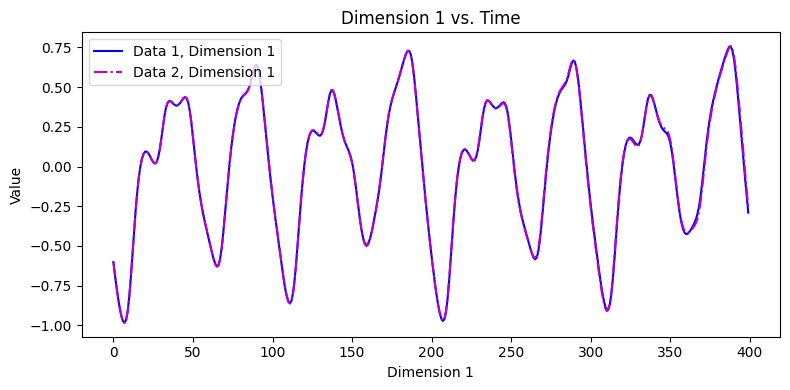

0.0035482593258707633
0.00012493420208170613


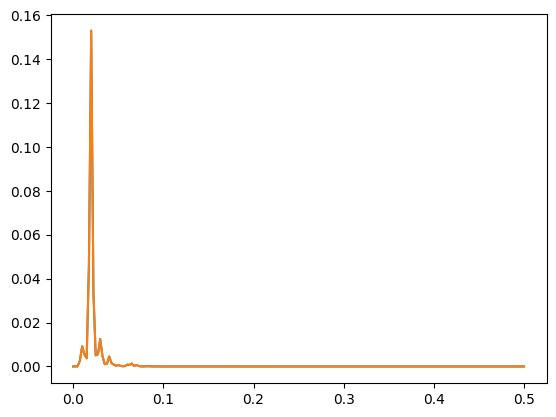

In [5]:
ld_coef, tau_coef, reg = 0.9, 0.5, 1e-10
volt = Volterra(ld_coef, tau_coef, reg, washout)
output = volt.Train(train_in, train_teach).PathContinue(train_teach[-1], test_teach.shape[0])

plot_data([test_teach, output])

freq1, psd1 = periodogram(test_teach[:, 0], window="hann", scaling="spectrum")
freq2, psd2 = periodogram(output[:, 0], window="hann", scaling="spectrum")

print(spec_dens_loss(test_teach, output))
print(calculate_mse(test_teach, output))

plt.plot(freq1, psd1)
plt.plot(freq2, psd2)
plt.show()

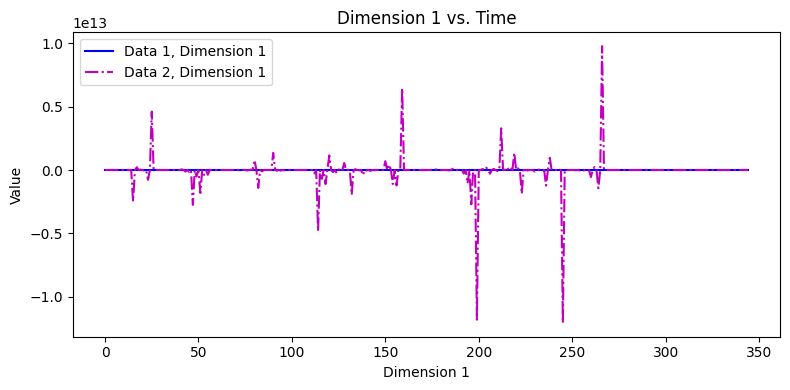

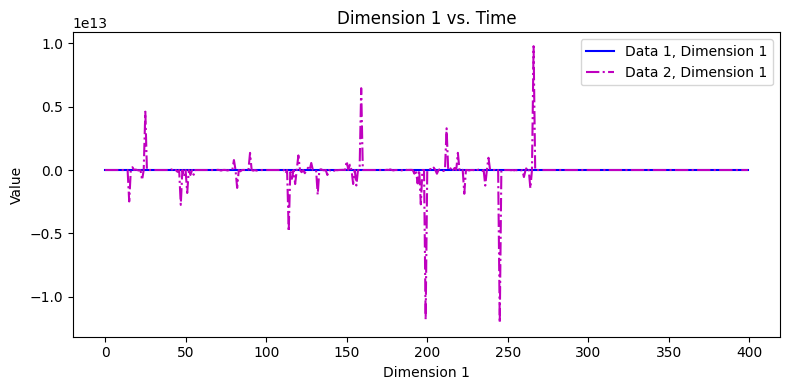

3.833443792609893e+24
1.3279007367428314e+24


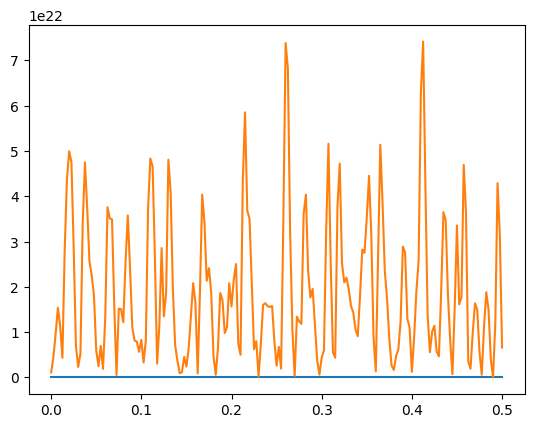

In [7]:
ld_coef, tau_coef, reg = 0.9, 0.1, 1e-15
volt = Volterra(ld_coef, tau_coef, reg, washout)
output = volt.Train(train_in, train_teach).PathContinue(train_teach[-1], test_teach.shape[0])

plot_data([test_teach[0:345], output[0:345]])
plot_data([test_teach, output])

freq1, psd1 = periodogram(test_teach[:, 0], window="hann", scaling="spectrum")
freq2, psd2 = periodogram(output[:, 0], window="hann", scaling="spectrum")

print(spec_dens_loss(test_teach, output))
print(calculate_mse(test_teach, output))

plt.plot(freq1, psd1)
plt.plot(freq2, psd2)
plt.show()


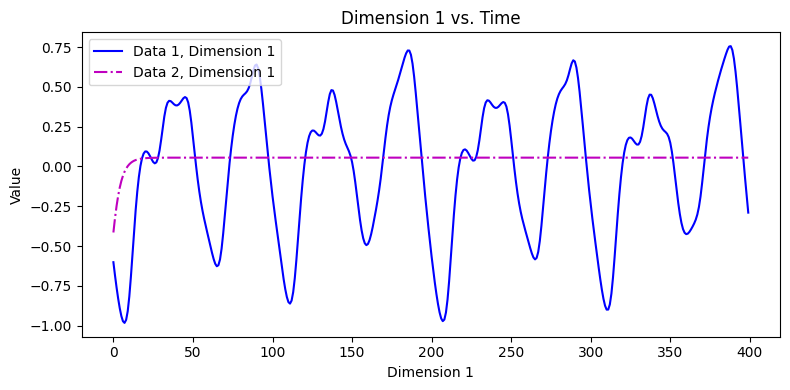

0.29725530901066854
0.19102609245667523


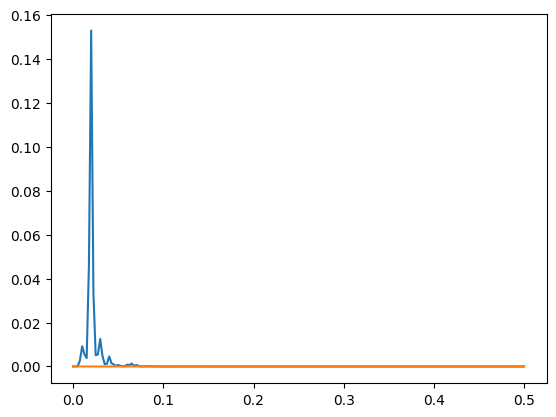

In [8]:
ld_coef, tau_coef, reg = 0.1, 0.9, 0.1
volt = Volterra(ld_coef, tau_coef, reg, washout)
output = volt.Train(train_in, train_teach).PathContinue(train_teach[-1], test_teach.shape[0])

plot_data([test_teach, output])

freq1, psd1 = periodogram(test_teach[:, 0], window="hann", scaling="spectrum")
freq2, psd2 = periodogram(output[:, 0], window="hann", scaling="spectrum")

print(spec_dens_loss(test_teach, output))
print(calculate_mse(test_teach, output))

plt.plot(freq1, psd1)
plt.plot(freq2, psd2)
plt.show()

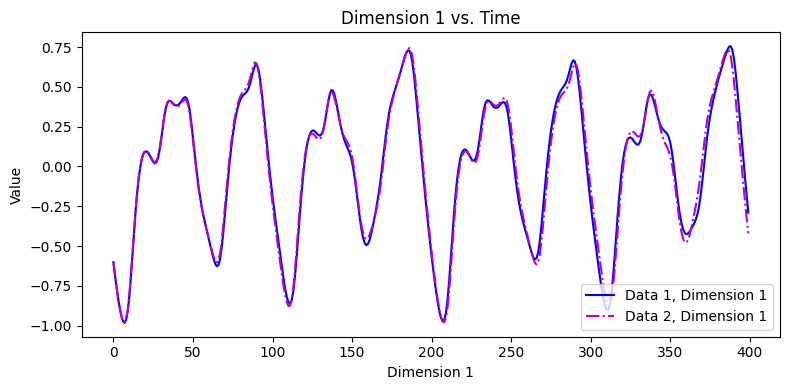

0.017838087980692835
0.002664048221836448


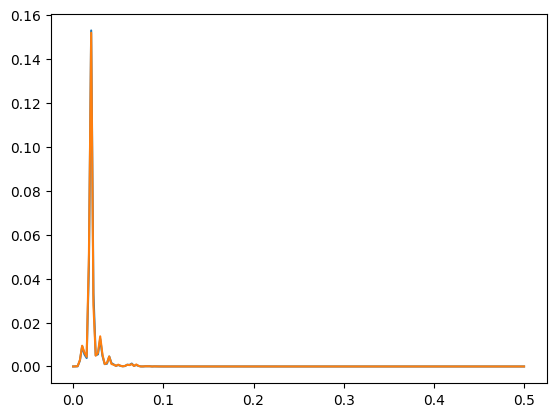

In [9]:
ld_coef, tau_coef, reg = 0.9, 0.5, 1e-11
volt = Volterra(ld_coef, tau_coef, reg, washout)
output = volt.Train(train_in, train_teach).PathContinue(train_teach[-1], test_teach.shape[0])

plot_data([test_teach, output])

freq1, psd1 = periodogram(test_teach[:, 0], window="hann", scaling="spectrum")
freq2, psd2 = periodogram(output[:, 0], window="hann", scaling="spectrum")

print(spec_dens_loss(test_teach, output))
print(calculate_mse(test_teach, output))

plt.plot(freq1, psd1)
plt.plot(freq2, psd2)
plt.show()

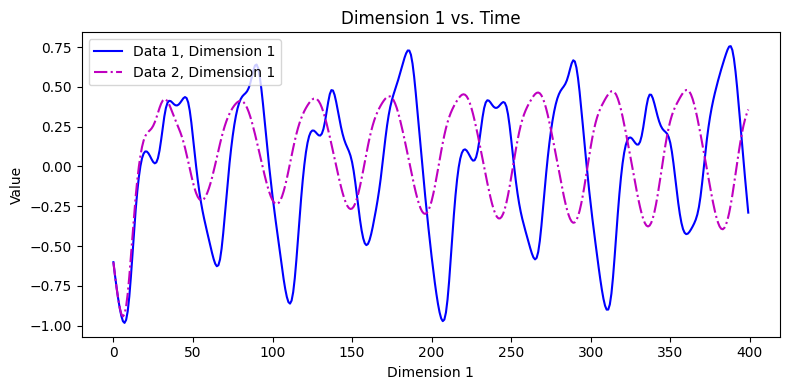

0.23597175956550678
0.3025445453896152


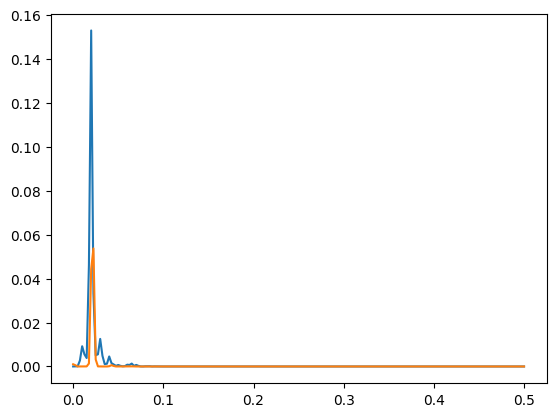

In [10]:
ld_coef, tau_coef, reg = 0.5, 0.2, 1e-07
volt = Volterra(ld_coef, tau_coef, reg, washout)
output = volt.Train(train_in, train_teach).PathContinue(train_teach[-1], test_teach.shape[0])

plot_data([test_teach, output])

freq1, psd1 = periodogram(test_teach[:, 0], window="hann", scaling="spectrum")
freq2, psd2 = periodogram(output[:, 0], window="hann", scaling="spectrum")

print(spec_dens_loss(test_teach, output))
print(calculate_mse(test_teach, output))

plt.plot(freq1, psd1)
plt.plot(freq2, psd2)
plt.show()

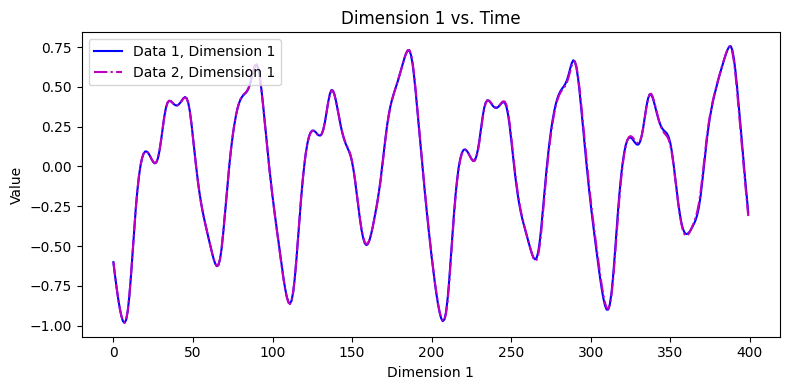

0.0035574234535887543
0.00011457105558107774


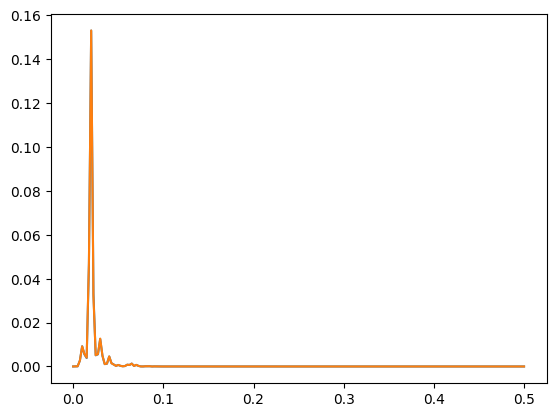

In [11]:
ld_coef, tau_coef, reg = 0.9, 0.5, 1e-07
volt = Volterra(ld_coef, tau_coef, reg, washout)
output = volt.Train(train_in, train_teach).PathContinue(train_teach[-1], test_teach.shape[0])

plot_data([test_teach, output])

freq1, psd1 = periodogram(test_teach[:, 0], window="hann", scaling="spectrum")
freq2, psd2 = periodogram(output[:, 0], window="hann", scaling="spectrum")

print(spec_dens_loss(test_teach, output))
print(calculate_mse(test_teach, output))

plt.plot(freq1, psd1)
plt.plot(freq2, psd2)
plt.show()

In [12]:
ld_coef, tau_coef, reg = 0.9, 0.1, 1e-11
volt = Volterra(ld_coef, tau_coef, reg, washout)

Gram = volt.Train(train_in, train_teach).Gram
nfeatures = volt.nfeatures
ntargets = volt.ntargets

def loss(alpha):
    
    alpha = alpha.reshape((nfeatures, ntargets), order="F")
    weights = alpha[0:nfeatures, :]
    shift = np.mean(train_teach, axis=0) -  weights.T @ np.mean(Gram[1000:, 1000: ], axis=0)
    forecast = np.matmul(Gram[1000:, 1000: ], weights) + shift 
    error = spec_dens_loss(train_teach[1000: ], forecast)
    
    return error
    
loss(np.concatenate(volt.alpha))

4.032523458171495e-05

In [13]:
np.random.seed(100)
init_alpha = np.random.uniform(size=nfeatures)
result = minimize(loss, init_alpha)
result

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.022507395350149145
        x: [ 5.458e-01  2.802e-01 ...  9.818e-01  3.650e-01]
      nit: 3
      jac: [ 2.030e-02  1.565e-02 ...  7.324e-03  1.168e-03]
 hess_inv: [[ 9.996e-01 -9.003e-05 ...  5.326e-04  8.613e-04]
            [-9.003e-05  1.000e+00 ...  5.217e-04  7.229e-04]
            ...
            [ 5.326e-04  5.217e-04 ...  1.001e+00  5.005e-04]
            [ 8.613e-04  7.229e-04 ...  5.005e-04  1.000e+00]]
     nfev: 152012
     njev: 76

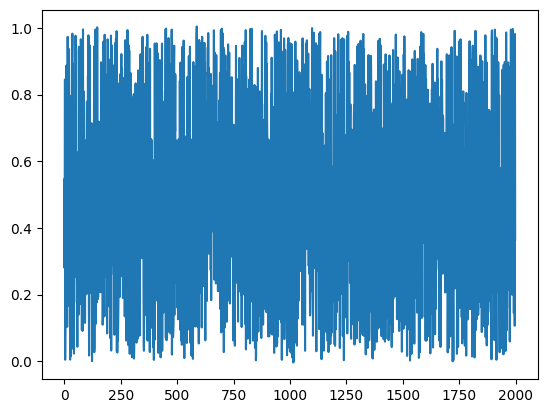

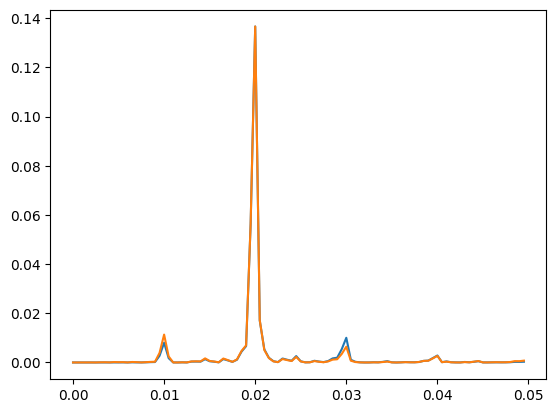

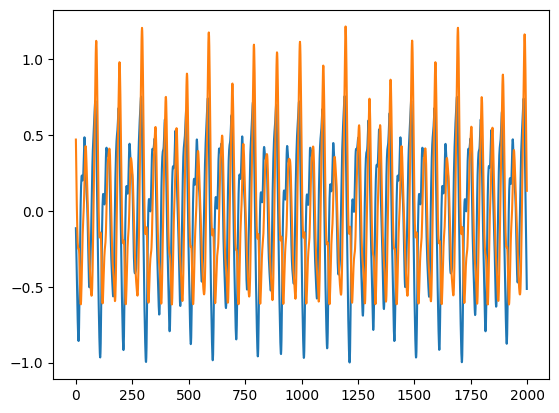

In [14]:
result_vec = result['x']
weights = result_vec.reshape((nfeatures, ntargets), order="F")[0:nfeatures, :]
shift = np.mean(train_teach, axis=0) -  weights.T @ np.mean(Gram[1000:, 1000: ], axis=0)

forecast = np.matmul(Gram[1000:, 1000: ], weights) + shift 

freq_true, psd_true = periodogram(train_teach[1000:, 0], window="hann", scaling="spectrum")
freq_pred, psd_pred = periodogram(forecast[:, 0], window="hann", scaling="spectrum")

plt.plot(weights)
plt.show()
plt.close()
plt.plot(freq_true[0:100], psd_true[0:100])
plt.plot(freq_pred[0:100], psd_pred[0:100])
plt.show()
plt.close()
plt.plot(train_teach[1000:])
plt.plot(forecast)
plt.show()
plt.close()

In [6]:
ld_coef, tau_coef, reg = 0.9, 0.5, 1e-07
volt = Volterra(ld_coef, tau_coef, reg, washout)

Gram = volt.Train(train_in, train_teach).Gram
nfeatures = volt.nfeatures
ntargets = volt.ntargets

def loss(alpha):
    
    alpha = alpha.reshape((nfeatures, ntargets), order="F")
    weights = alpha[0:nfeatures, :]
    shift = 0 #np.mean(train_teach, axis=0) -  weights.T @ np.mean(Gram[1000:, 1000: ], axis=0)
    forecast = np.matmul(Gram[1000:, 1000: ], weights) + shift 
    error = spec_dens_loss(train_teach[1000: ], forecast)
    
    return error
    
loss(np.concatenate(volt.alpha))

5.962819501605614e-06

In [ ]:
5.962819501663515e-06

In [ ]:
ld_coef, tau_coef, reg = 0.9, 0.5, 1e-07
volt = Volterra(ld_coef, tau_coef, reg, washout)

Gram = volt.Train(train_in, train_teach).Gram
nfeatures = volt.nfeatures
ntargets = volt.ntargets

def loss(alpha):
    
    alpha = alpha.reshape((nfeatures, ntargets), order="F")
    weights = alpha[0:nfeatures, :]
    shift = 0 #np.mean(train_teach, axis=0) -  weights.T @ np.mean(Gram[1000:, 1000: ], axis=0)
    forecast = np.matmul(Gram[1000:, 1000: ], weights) + shift 
    error = spec_dens_loss(train_teach[1000: ], forecast)
    
    return error
    
loss(np.concatenate(volt.alpha))

In [38]:
np.random.seed(100)
init_alpha = np.random.uniform(size=nfeatures)
result = minimize(loss, init_alpha)
result

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.017631171700795357
        x: [ 1.758e-01 -4.179e-02 ...  6.139e-01 -1.103e-02]
      nit: 48
      jac: [-1.066e-02 -2.206e-03 ...  1.522e-02  2.439e-02]
 hess_inv: [[ 4.334e+00  3.825e+00 ...  4.634e+00  4.191e+00]
            [ 3.825e+00  5.389e+00 ...  5.316e+00  4.807e+00]
            ...
            [ 4.634e+00  5.316e+00 ...  7.438e+00  5.822e+00]
            [ 4.191e+00  4.807e+00 ...  5.822e+00  6.264e+00]]
     nfev: 250011
     njev: 125

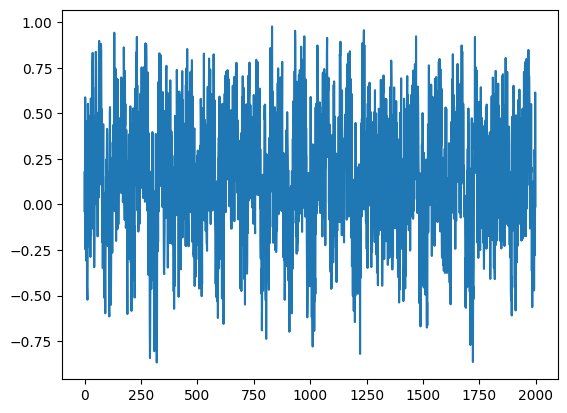

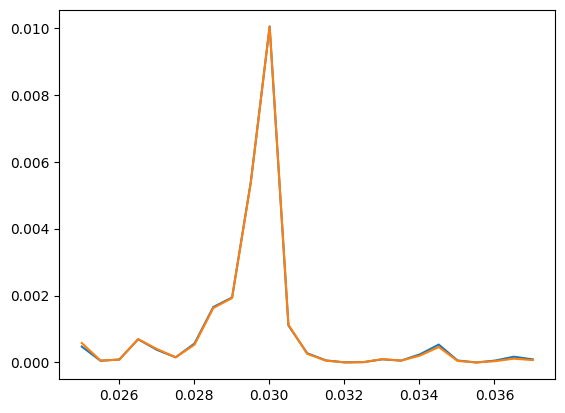

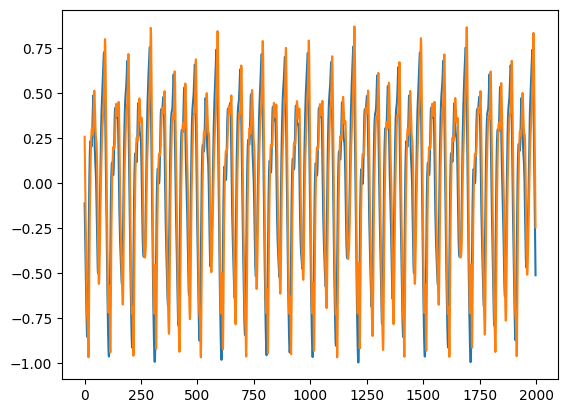

In [45]:
result_vec = result['x']
weights = result_vec.reshape((nfeatures, ntargets), order="F")[0:nfeatures, :]
shift = np.mean(train_teach, axis=0) -  weights.T @ np.mean(Gram[1000:, 1000: ], axis=0)

forecast = np.matmul(Gram[1000:, 1000: ], weights) + shift 

freq_true, psd_true = periodogram(train_teach[1000:, 0], window="hann", scaling="spectrum")
freq_pred, psd_pred = periodogram(forecast[:, 0], window="hann", scaling="spectrum")

plt.plot(weights)
plt.show()
plt.close()
plt.plot(freq_true[50:75], psd_true[50:75])
plt.plot(freq_pred[50:75], psd_pred[50:75])
plt.show()
plt.close()
plt.plot(train_teach[1000:])
plt.plot(-forecast)
plt.show()
plt.close()

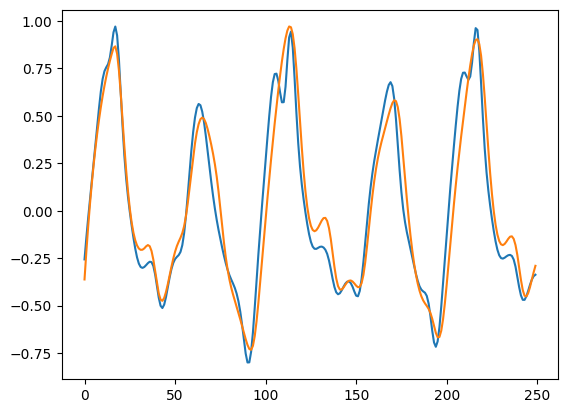

In [43]:
plt.plot(forecast[0:250])
plt.plot(-train_teach[0:250])